In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dataPreprocess import *

In [2]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

def gradients(X, y, y_hat):
    
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    # dw = (1/m)*np.dot(X_temp.T, (y_hat - y))
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db
    
def normalize(X):
    
    # X --> Input.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X

def train(X, y, bs, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
#     # Normalizing the inputs.
#     x = normalize(X)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            regularization = np.zeros(w.shape)
            # regularization[0] = float(np.sign(w[0]))
            # regularization[0] = w[0]
            # regularization[1] = w[1]
            # w -= lr*dw                          
            w -= lr*(dw + regularization)
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses

def predict(X):
    
    # X --> Input.
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

In [3]:
bh_file_path = 'data_stephen_fix_header.csv'
label = 'visible_ice'
list_cols = ['latitude', 'longitude','depth']

df = pd.read_csv(bh_file_path, header=[0])

df, n_classes = prepare_df(df, list_cols, label)                              

Dataframe has length 2837
Number of unique boreholes is 566
Latitude ranges from 68.36933 to 69.44755
Longitude ranges from -133.82843 to -132.89346
List of columns normalized: ['latitude_norm', 'longitude_norm', 'depth_norm']
visible_ice: 'None' entries have been replaced by 'No visible ice'
visible_ice column entries has been ordered:
[NaN, 'Pure ice', 'No visible ice', 'High', 'Medium to high', 'Low']
Categories (5, object): ['No visible ice' < 'Low' < 'Medium to high' < 'High' < 'Pure ice']
with corresponding codes in visible_ice_code column:
[-1  4  0  3  2  1]
visible_ice: binary column generated
materials: 'ICE' and 'ice' entries has been standardized into 'Ice'
'material_ice' column generated
materials has been categorized into codes in materials_code
Null entries of visible_ice dropped


In [4]:
df2 = df[['latitude_norm', 'longitude_norm', 'depth_norm']]

In [5]:
X = df2.to_numpy()
y = df[['visible_ice_binary']].to_numpy(dtype='float').reshape(len(df))

In [6]:
X

array([[ 1.43994578,  1.85145514, -0.83590049],
       [ 1.43994578,  1.85145514, -0.55346609],
       [ 1.43994578,  1.85145514,  0.38798192],
       ...,
       [-1.49448906, -0.92767219, -1.05108861],
       [-1.49448906, -0.92767219, -0.97039306],
       [-1.49448906, -0.92767219,  0.24004009]])

In [7]:
y

array([1., 0., 0., ..., 0., 0., 0.])

In [8]:
# Training 
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)# Plotting Decision Boundary
# plot_decision_boundary(X, w, b)
accuracy(y, predict(X))

0.6526162790697675

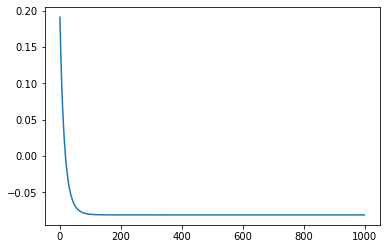

In [9]:
plt.plot(range(len(l)), l)

In [10]:
long_max = df.longitude_norm.max()
long_min = df.longitude_norm.min()
long_range = np.linspace(long_min, long_max, 10)

lat_max = df.latitude_norm.max()
lat_min = df.latitude_norm.min()
lat_range = np.linspace(lat_min, lat_max, 10)

In [11]:
xx, yy = np.meshgrid(long_range, lat_range)

In [12]:
w[0]

array([0.10084016])

In [13]:
w[1]

array([0.05206357])

In [14]:
z = -b/w[2] - w[0]/w[2] * yy - w[1]/w[2] * xx

In [15]:
-b/w[2]

array([-1.75572596])

In [16]:
-w[0]/w[2]

array([-0.27892682])

In [21]:
def set_axes_equal(ax):
    """
    Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    """

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

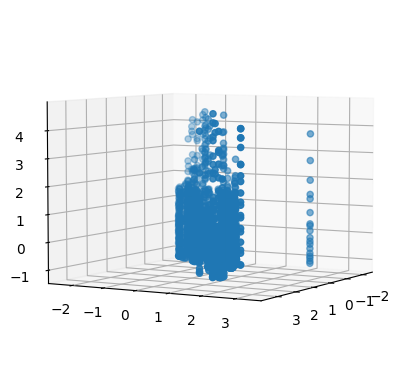

In [35]:
%matplotlib notebook
# Create the figure
fig = plt.figure()

# Add an axes
ax = fig.add_subplot(111,projection='3d')

# plot the surface
#ax.plot_surface(xx, yy, z, alpha=0.2)

# and plot the point 
ax.scatter(df.longitude_norm , df.latitude_norm , df.depth_norm)

set_axes_equal(ax)
ax.view_init(5, 30)




In [18]:
import pickle
pickle.dump(fig, open('DecisionBoundary.fig.pickle', 'wb'))